**Import Library**


In [ ]:
%matplotlib inline
from pandas import DataFrame
import pandas as pd

**Load Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Skripsi/datagabung8k.csv', sep=';')

df = pd.DataFrame(dataset)
print(df.shape)
df.head()

(8000, 85)


,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,216.58.219.234-10.42.0.211-443-54481-6,10.42.0.211,54481,216.58.219.234,443,6,30/08/2017 10:26,36700,1,1,...,32,0,0,0,0,0,0,0,0,RANSOMWARE_PORNDROID
1,216.58.219.234-10.42.0.211-443-36689-6,10.42.0.211,36689,216.58.219.234,443,6,30/08/2017 10:26,36483,1,1,...,32,0,0,0,0,0,0,0,0,RANSOMWARE_PORNDROID
2,172.217.10.46-10.42.0.211-443-44595-6,10.42.0.211,44595,172.217.10.46,443,6,30/08/2017 10:26,36777,1,2,...,32,0,0,0,0,0,0,0,0,RANSOMWARE_PORNDROID
3,216.58.219.225-10.42.0.211-443-46117-6,10.42.0.211,46117,216.58.219.225,443,6,30/08/2017 10:26,36640,1,1,...,32,0,0,0,0,0,0,0,0,RANSOMWARE_PORNDROID
4,172.217.11.4-10.42.0.211-443-50580-6,10.42.0.211,50580,172.217.11.4,443,6,30/08/2017 10:26,36750,1,1,...,32,0,0,0,0,0,0,0,0,RANSOMWARE_PORNDROID


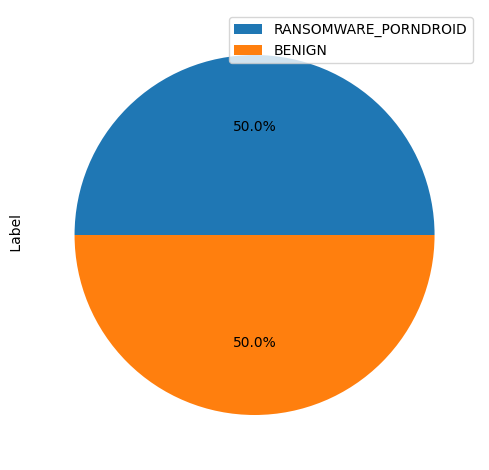

In [ ]:
import seaborn as sns
import matplotlib.pylab as plt
df[' Label'].value_counts().plot.pie(autopct='%1.1f%%', labels=None, legend=True)
plt.tight_layout()

In [ ]:
df = df.drop(['Active Mean', ' Active Std', ' Active Min',
              ' Active Max', 'Idle Mean', ' Idle Std',
              ' Idle Min', ' Idle Max', ' Timestamp'], axis=1)
print(df.shape)

(8000, 76)


**Cleaning Data**

Cek Nilai Kosong

In [ ]:
df.isnull().values.any() # mendeteksi keberadaan nilai kosong

False

In [ ]:
 df.isnull().sum()

Flow ID                     0
 Source IP                  0
 Source Port                0
 Destination IP             0
 Destination Port           0
                           ..
Init_Win_bytes_forward      0
 Init_Win_bytes_backward    0
 act_data_pkt_fwd           0
 min_seg_size_forward       0
 Label                      0
Length: 76, dtype: int64

In [ ]:
 data_clean = df.dropna()
 data_clean.describe()

,Source Port,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,...,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward
count,8000.000000,8000.000000,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8.000000e+03,8000.000000,8000.000000,...,8000.0,8000.0,8000.000000,8000.000000,8000.000000,8.000000e+03,8000.000000,8000.000000,8000.000000,8000.000000
mean,39045.474875,5622.154875,8.120750,9.262001e+06,6.283250,8.084875,615.066125,7.848831e+03,211.236625,11.170375,...,0.0,0.0,6.283250,615.066125,8.084875,7.848831e+03,23910.567875,1904.455750,1.350125,27.717750
std,18530.518507,15004.214718,4.424095,2.040831e+07,17.337779,41.651576,2833.967314,5.774511e+04,354.083802,52.689220,...,0.0,0.0,17.337779,2833.967314,41.651576,5.774511e+04,30963.993125,8184.056123,3.922271,6.562924
min,0.000000,0.000000,0.000000,2.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.0,0.0,1.000000,0.000000,0.000000,0.000000e+00,-1.000000,-1.000000,0.000000,-1.000000
25%,33908.000000,80.000000,6.000000,4.929400e+04,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.0,0.0,1.000000,0.000000,0.000000,0.000000e+00,35.000000,-1.000000,0.000000,20.000000
50%,42937.000000,443.000000,6.000000,5.897005e+05,2.000000,1.000000,31.000000,3.100000e+01,31.000000,0.000000,...,0.0,0.0,2.000000,31.000000,1.000000,3.100000e+01,1547.500000,31.000000,0.000000,32.000000
75%,53049.250000,443.000000,6.000000,8.744920e+06,6.000000,5.000000,558.500000,4.130000e+02,379.000000,0.000000,...,0.0,0.0,6.000000,558.500000,5.000000,4.130000e+02,65535.000000,336.000000,2.000000,32.000000
max,65508.000000,62233.000000,17.000000,1.199990e+08,652.000000,1859.000000,130016.000000,2.619262e+06,1460.000000,1460.000000,...,0.0,0.0,652.000000,130016.000000,1859.000000,2.619262e+06,65535.000000,65535.000000,139.000000,44.000000


In [ ]:
df[df.duplicated()]

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Label


In [ ]:
 print(data_clean.shape)

(8000, 76)


In [ ]:
data_clean.isnull().sum()

Flow ID                     0
 Source IP                  0
 Source Port                0
 Destination IP             0
 Destination Port           0
                           ..
Init_Win_bytes_forward      0
 Init_Win_bytes_backward    0
 act_data_pkt_fwd           0
 min_seg_size_forward       0
 Label                      0
Length: 76, dtype: int64

Data Duplikat

In [ ]:
df.duplicated().value_counts()

False    8000
dtype: int64

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7995    False
7996    False
7997    False
7998    False
7999    False
Length: 8000, dtype: bool

In [ ]:
df.drop_duplicates(inplace=True) # menghapus duplikasi data
df.shape

(8000, 76)

In [ ]:
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Label
0,216.58.219.234-10.42.0.211-443-54481-6,10.42.0.211,54481,216.58.219.234,443,6,36700,1,1,0.0,...,0,1,0,1,0,1637,181,0,32,RANSOMWARE_PORNDROID
1,216.58.219.234-10.42.0.211-443-36689-6,10.42.0.211,36689,216.58.219.234,443,6,36483,1,1,0.0,...,0,1,0,1,0,2949,181,0,32,RANSOMWARE_PORNDROID
2,172.217.10.46-10.42.0.211-443-44595-6,10.42.0.211,44595,172.217.10.46,443,6,36777,1,2,23.0,...,0,1,23,2,0,1419,185,0,32,RANSOMWARE_PORNDROID
3,216.58.219.225-10.42.0.211-443-46117-6,10.42.0.211,46117,216.58.219.225,443,6,36640,1,1,0.0,...,0,1,0,1,0,1594,175,0,32,RANSOMWARE_PORNDROID
4,172.217.11.4-10.42.0.211-443-50580-6,10.42.0.211,50580,172.217.11.4,443,6,36750,1,1,0.0,...,0,1,0,1,0,1593,175,0,32,RANSOMWARE_PORNDROID


**Scalling**

Mengubah Data String menjadi data Int

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['Flow ID'] = encoder.fit_transform(df['Flow ID'])
df[' Destination IP'] = encoder.fit_transform(df[' Destination IP'])
df[' Source IP'] = encoder.fit_transform(df[' Source IP'])
df[' Source Port'] = encoder.fit_transform(df[' Source Port'])
df[' Destination Port'] = encoder.fit_transform(df[' Destination Port'])
df[' Label'] = encoder.fit_transform(df[' Label'])
df[' Total Fwd Packets'] = encoder.fit_transform(df[' Total Fwd Packets'])
df[' Total Backward Packets'] = encoder.fit_transform(df[' Total Backward Packets'])
df['Total Length of Fwd Packets'] = encoder.fit_transform(df['Total Length of Fwd Packets'])
df[' Total Length of Bwd Packets'] = encoder.fit_transform(df[' Total Length of Bwd Packets'])
df[' Fwd Packet Length Max'] = encoder.fit_transform(df[' Fwd Packet Length Max'])
df[' Fwd Packet Length Min'] = encoder.fit_transform(df[' Fwd Packet Length Min'])
df[' Fwd Packet Length Mean'] = encoder.fit_transform(df[' Fwd Packet Length Mean'])
df[' Fwd Packet Length Std'] = encoder.fit_transform(df[' Fwd Packet Length Std'])
df['Bwd Packet Length Max'] = encoder.fit_transform(df['Bwd Packet Length Max'])
df[' Bwd Packet Length Min'] = encoder.fit_transform(df[' Bwd Packet Length Min'])
df[' Bwd Packet Length Mean'] = encoder.fit_transform(df[' Bwd Packet Length Mean'])
df[' Bwd Packet Length Std'] = encoder.fit_transform(df[' Bwd Packet Length Std'])
df['Flow Bytes/s'] = encoder.fit_transform(df['Flow Bytes/s'])
df[' Flow Packets/s'] = encoder.fit_transform(df[' Flow Packets/s'])
df[' Flow IAT Mean'] = encoder.fit_transform(df[' Flow IAT Mean'])
df[' Flow IAT Std'] = encoder.fit_transform(df[' Flow IAT Std'])
df[' Flow IAT Max'] = encoder.fit_transform(df[' Flow IAT Max'])
df[' Flow IAT Min'] = encoder.fit_transform(df[' Flow IAT Min'])
df['Fwd IAT Total'] = encoder.fit_transform(df['Fwd IAT Total'])
df[' Fwd IAT Mean'] = encoder.fit_transform(df[' Fwd IAT Mean'])
df[' Fwd IAT Std'] = encoder.fit_transform(df[' Fwd IAT Std'])
df[' Fwd IAT Max'] = encoder.fit_transform(df[' Fwd IAT Max'])
df[' Fwd IAT Min'] = encoder.fit_transform(df[' Fwd IAT Min'])
df['Bwd IAT Total'] = encoder.fit_transform(df['Bwd IAT Total'])
df[' Bwd IAT Mean'] = encoder.fit_transform(df[' Bwd IAT Mean'])
df[' Bwd IAT Std'] = encoder.fit_transform(df[' Bwd IAT Std'])
df[' Bwd IAT Max'] = encoder.fit_transform(df[' Bwd IAT Max'])
df[' Bwd IAT Min'] = encoder.fit_transform(df[' Bwd IAT Min'])
df['Fwd PSH Flags'] = encoder.fit_transform(df['Fwd PSH Flags'])
df[' Bwd PSH Flags'] = encoder.fit_transform(df[' Bwd PSH Flags'])
df[' Fwd URG Flags'] = encoder.fit_transform(df[' Fwd URG Flags'])
df[' Bwd URG Flags'] = encoder.fit_transform(df[' Bwd URG Flags'])
df[' Fwd Header Length'] = encoder.fit_transform(df[' Fwd Header Length'])
df[' Bwd Header Length'] = encoder.fit_transform(df[' Bwd Header Length'])
df['Fwd Packets/s'] = encoder.fit_transform(df['Fwd Packets/s'])
df[' Bwd Packets/s'] = encoder.fit_transform(df[' Bwd Packets/s'])
df[' Min Packet Length'] = encoder.fit_transform(df[' Min Packet Length'])
df[' Max Packet Length'] = encoder.fit_transform(df[' Max Packet Length'])
df[' Packet Length Mean'] = encoder.fit_transform(df[' Packet Length Mean'])
df[' Packet Length Std'] = encoder.fit_transform(df[' Packet Length Std'])
df[' Packet Length Variance'] = encoder.fit_transform(df[' Packet Length Variance'])
df['FIN Flag Count'] = encoder.fit_transform(df['FIN Flag Count'])
df[' SYN Flag Count'] = encoder.fit_transform(df[' SYN Flag Count'])
df[' RST Flag Count'] = encoder.fit_transform(df[' RST Flag Count'])
df[' PSH Flag Count'] = encoder.fit_transform(df[' PSH Flag Count'])
df[' ACK Flag Count'] = encoder.fit_transform(df[' ACK Flag Count'])
df[' URG Flag Count'] = encoder.fit_transform(df[' URG Flag Count'])
df[' CWE Flag Count'] = encoder.fit_transform(df[' CWE Flag Count'])
df[' ECE Flag Count'] = encoder.fit_transform(df[' ECE Flag Count'])
df[' Down/Up Ratio'] = encoder.fit_transform(df[' Down/Up Ratio'])
df[' Average Packet Size'] = encoder.fit_transform(df[' Average Packet Size'])
df[' Avg Fwd Segment Size'] = encoder.fit_transform(df[' Avg Fwd Segment Size'])
df[' Avg Bwd Segment Size'] = encoder.fit_transform(df[' Avg Bwd Segment Size'])
df[' Fwd Header Length'] = encoder.fit_transform(df[' Fwd Header Length'])
df['Subflow Fwd Packets'] = encoder.fit_transform(df['Subflow Fwd Packets'])
df[' Subflow Fwd Bytes'] = encoder.fit_transform(df[' Subflow Fwd Bytes'])
df[' Subflow Bwd Packets'] = encoder.fit_transform(df[' Subflow Bwd Packets'])
df[' Subflow Bwd Bytes'] = encoder.fit_transform(df[' Subflow Bwd Bytes'])
df['Init_Win_bytes_forward'] = encoder.fit_transform(df['Init_Win_bytes_forward'])
df[' Init_Win_bytes_backward'] = encoder.fit_transform(df[' Init_Win_bytes_backward'])
df[' min_seg_size_forward'] = encoder.fit_transform(df[' min_seg_size_forward'])
df['Flow ID'] = encoder.fit_transform(df['Flow ID'])

In [ ]:
df

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,...,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Label
0,4413,3,3273,352,6,6,36700,0,1,0,...,0,0,0,1,0,301,117,0,5,1
1,4398,3,1190,352,6,6,36483,0,1,0,...,0,0,0,1,0,470,117,0,5,1
2,3141,3,2093,173,6,6,36777,0,2,6,...,0,0,6,2,0,248,121,0,5,1
3,4385,3,2265,349,6,6,36640,0,1,0,...,0,0,0,1,0,291,111,0,5,1
4,3198,3,2736,183,6,6,36750,0,1,0,...,0,0,0,1,0,290,111,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,4200,3,3117,321,4,6,30068727,5,9,123,...,0,5,123,9,950,611,73,1,5,0
7996,4202,3,3119,321,4,6,30061894,9,11,123,...,0,9,123,11,1088,611,73,1,5,0
7997,4198,3,3108,321,4,6,32306350,12,30,320,...,0,12,320,30,1444,611,81,2,5,0
7998,4199,3,3116,321,4,6,30074701,5,7,121,...,0,5,121,7,682,611,73,1,5,0


In [ ]:
df[' Label'].value_counts()

1    4000
0    4000
Name:  Label, dtype: int64

In [ ]:
x = df.iloc[:, 0:75]
y = df.iloc[:, 75]

In [ ]:
print(x.head())
print(y.head())
print(x.shape)
print(y.shape)

   Flow ID   Source IP   Source Port   Destination IP   Destination Port  \
0     4413           3          3273              352                  6   
1     4398           3          1190              352                  6   
2     3141           3          2093              173                  6   
3     4385           3          2265              349                  6   
4     3198           3          2736              183                  6   

    Protocol   Flow Duration   Total Fwd Packets   Total Backward Packets  \
0          6           36700                   0                        1   
1          6           36483                   0                        1   
2          6           36777                   0                        2   
3          6           36640                   0                        1   
4          6           36750                   0                        1   

   Total Length of Fwd Packets  ...   Bwd Avg Packets/Bulk  Bwd Avg Bulk Rate  \

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

print('training dataset')
print(x_train.shape)
print(y_train.shape)
print('testing dataset:')
print(x_test.shape)
print(y_test.shape)

print(y_train.head())
print(y_test.head())

training dataset
(5600, 75)
(5600,)
testing dataset:
(2400, 75)
(2400,)
607     1
5279    0
6403    0
1732    1
5266    0
Name:  Label, dtype: int64
3069    1
1675    1
6385    0
543     1
3213    1
Name:  Label, dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
print(x_train)

[[ 0.25511525 -0.30677775 -0.17661622 ...  2.48570047 -0.35375408
  -1.29459887]
 [-0.24417115 -0.30677775  0.10596096 ... -0.28332415 -0.084447
   0.71605667]
 [ 1.33031122 -0.30677775  0.66954108 ... -0.68402533 -0.35375408
   0.71605667]
 ...
 [ 0.5294756  -0.30677775 -0.06090913 ...  0.32669855  3.1472379
   0.71605667]
 [-0.80525042 -0.09863534 -1.52023531 ...  1.39124797 -0.35375408
   0.71605667]
 [-2.01886242 -0.30677775 -1.29039537 ... -0.68402533 -0.35375408
  -1.29459887]]


In [ ]:
x_test = scaler.transform(x_test)
print(x_test)

[[-0.48063187  0.56048228 -1.51944819 ...  1.39124797 -0.35375408
  -1.29459887]
 [ 0.55419275 -0.30677775  0.50503236 ... -0.01419648  0.45416715
   0.71605667]
 [ 1.3772738  -0.30677775  0.74825339 ... -0.68402533 -0.35375408
   0.71605667]
 ...
 [-0.28866201 -0.30677775  0.18309902 ...  1.14006216  0.72347422
   0.71605667]
 [ 0.53441903 -0.30677775  0.26574695 ... -0.68402533 -0.35375408
   0.71605667]
 [-0.73439459 -0.30677775  1.06782536 ...  1.03241109 -0.35375408
   0.71605667]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
model_rf = RandomForestClassifier(n_estimators=300, random_state=0)
model_rf.fit(x_train,y_train)
y_pred = model_rf.predict(x_test)

In [ ]:
model_rf.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=209652396),
 DecisionTreeClassifier(max_features='sqrt', random_state=398764591),
 DecisionTreeClassifier(max_features='sqrt', random_state=924231285),
 DecisionTreeClassifier(max_features='sqrt', random_state=1478610112),
 DecisionTreeClassifier(max_features='sqrt', random_state=441365315),
 DecisionTreeClassifier(max_features='sqrt', random_state=1537364731),
 DecisionTreeClassifier(max_features='sqrt', random_state=192771779),
 DecisionTreeClassifier(max_features='sqrt', random_state=1491434855),
 DecisionTreeClassifier(max_features='sqrt', random_state=1819583497),
 DecisionTreeClassifier(max_features='sqrt', random_state=530702035),
 DecisionTreeClassifier(max_features='sqrt', random_state=626610453),
 DecisionTreeClassifier(max_features='sqrt', random_state=1650906866),
 DecisionTreeClassifier(max_features='sqrt', random_state=1879422756),
 DecisionTreeClassifier(max_features='sqrt', random_state=1277901399),
 DecisionTree

In [ ]:
len(model_rf.estimators_)

300

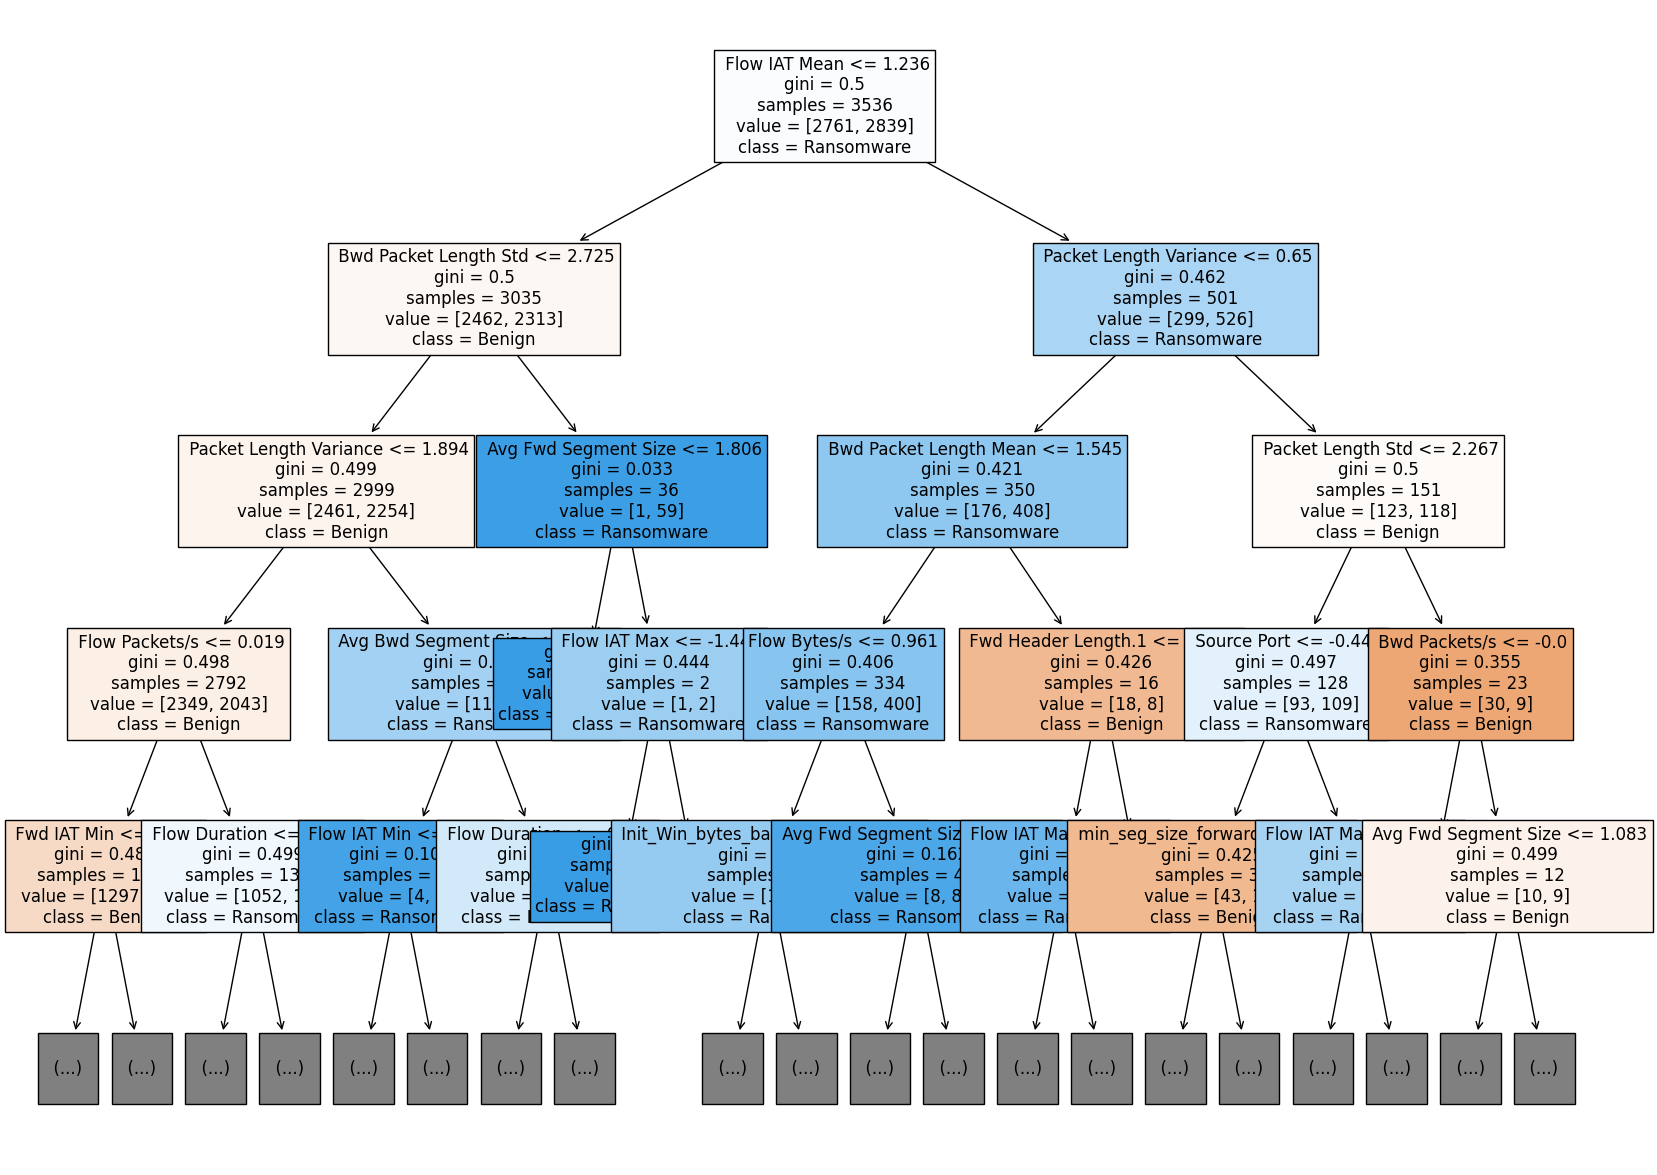

In [ ]:
plt.figure(figsize=(20,15))
plt.xlim(4, 6)
plt.ylim(4, 6)
tree.plot_tree(model_rf.estimators_[2], feature_names = df.columns,
               class_names={0:'Benign', 1:'Ransomware'},
               filled=True, max_depth=4, fontsize=12)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

cf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(cf_matrix)

result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)

result2 = accuracy_score(y_test,y_pred)

print("Accuracy:",result2)

Confusion Matrix:
[[1010  193]
 [ 188 1009]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1203
           1       0.84      0.84      0.84      1197

    accuracy                           0.84      2400
   macro avg       0.84      0.84      0.84      2400
weighted avg       0.84      0.84      0.84      2400

Accuracy: 0.84125


In [ ]:
# Lakukan prediksi pada data uji
predictions = model_rf.predict(x_test)

# Tampilkan output prediksi
print(predictions)

[1 1 0 ... 0 0 1]


In [ ]:
# parameters = model_rf.get_params()

#for param, value in parameters.items():
 #   print(f"{param}: {value}")

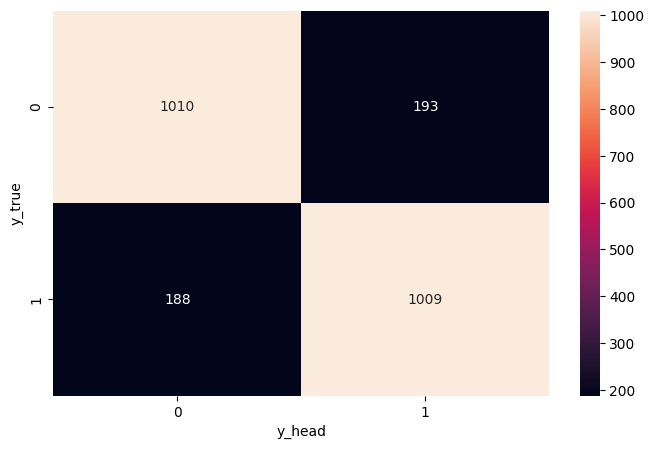

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt=".0f", ax=ax)
plt.xlabel("y_head")
plt.ylabel("y_true")
plt.show()